In [1]:
import pandas as pd

white_wine = pd.read_csv("../winequality-white.csv", sep=';')


white_wine.head()
white_wine.shape

white_wine.info()

white_wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


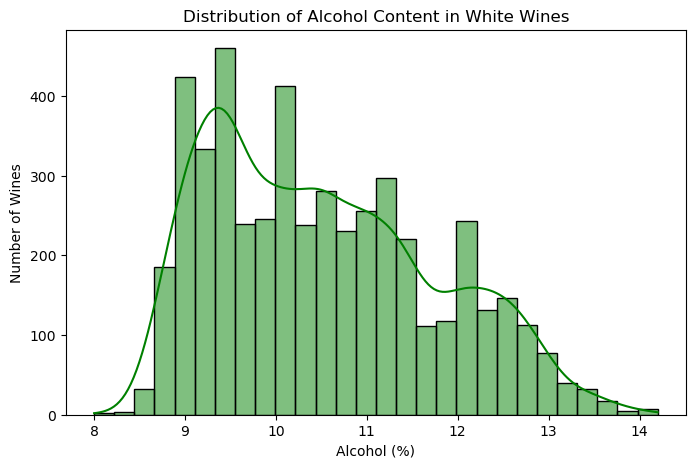

Total number of wines: 4898
Average alcohol content: 10.51%
Alcohol range: 8.0% - 14.2%


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualisation - alcohol distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=white_wine, x='alcohol', kde=True, color='green')

plt.title('Distribution of Alcohol Content in White Wines')
plt.xlabel('Alcohol (%)')
plt.ylabel('Number of Wines')

plt.show()

# basic statistics
print(f"Total number of wines: {len(white_wine)}")
print(f"Average alcohol content: {white_wine['alcohol'].mean():.2f}%")
print(f"Alcohol range: {white_wine['alcohol'].min():.1f}% - {white_wine['alcohol'].max():.1f}%")

C:\Users\wikto\AppData\Local\Temp\ipykernel_47616\3206456120.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=white_wine, order=all_quality_scores, palette='YlGn')


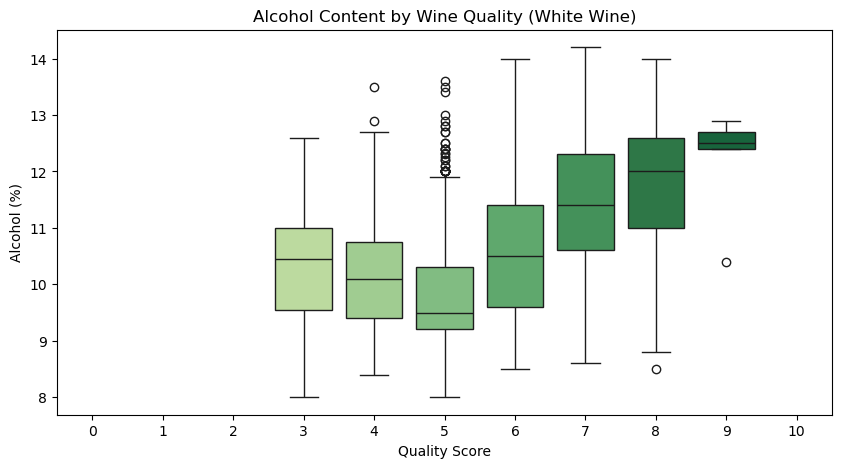

In [3]:
# alcohol content by wine quality in white wine

import numpy as np

# creating a full range of possible quality scores
all_quality_scores = np.arange(0, 11)

plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='alcohol', data=white_wine, order=all_quality_scores, palette='YlGn')

# visualization 
plt.title('Alcohol Content by Wine Quality (White Wine)')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (%)')

plt.show()

In [4]:
# Correlation between alcohol and quality
correlation = white_wine[['alcohol', 'quality']].corr()
correlation

,alcohol,quality
alcohol,1.000000,0.435575
quality,0.435575,1.000000


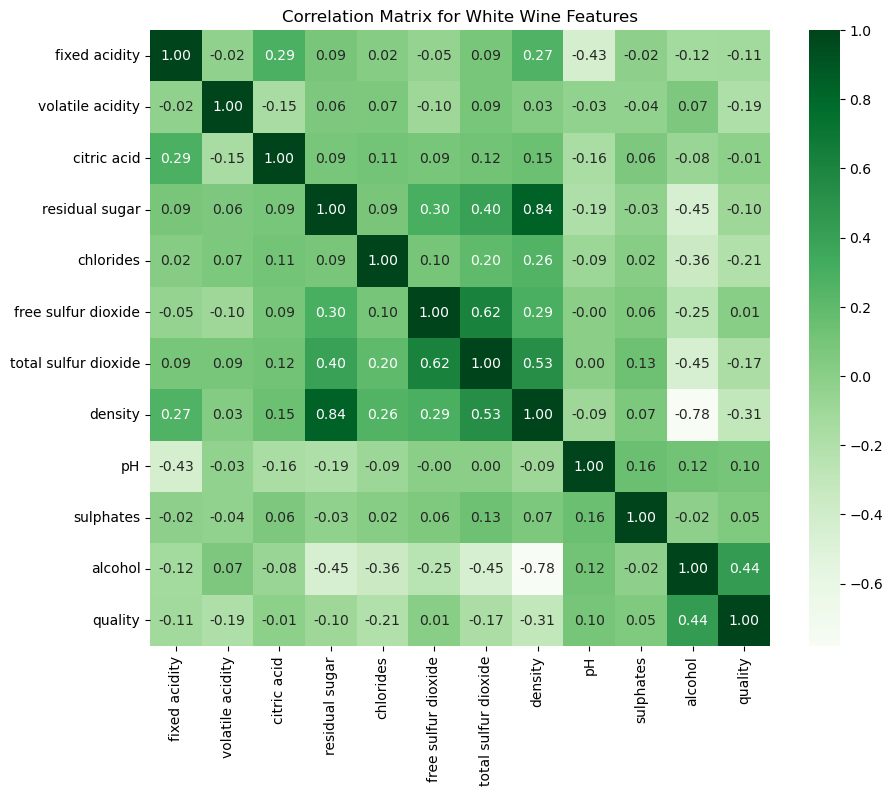

In [5]:
# *** correlation matrix for features in white wine ***

correlation_matrix = white_wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")

plt.title("Correlation Matrix for White Wine Features")
plt.show()

Pearson correlation: 0.4356
P-value: 0.000000


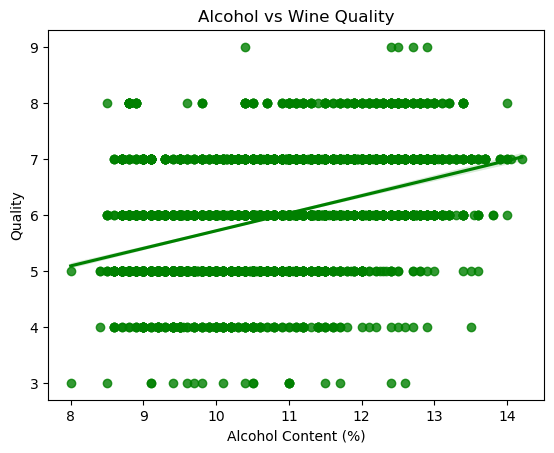

In [6]:
# *** Pearson Correlation *** 

from scipy.stats import pearsonr

r, p_value = pearsonr(white_wine['alcohol'], white_wine['quality'])

print(f"Pearson correlation: {r:.4f}")
print(f"P-value: {p_value:.6f}")

# Visualization 

sns.regplot(
    x='alcohol',
    y='quality',
    data=white_wine,
    color='green', 
    #scatter_kws={"alpha": 0.5} 
)
plt.title("Alcohol vs Wine Quality")
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Quality")
plt.show()

In [7]:
# *** Decison Tree all features ***

In [8]:
# Define features (X) and target (y)
X = white_wine.drop("quality", axis=1) 
y = white_wine["quality"]               

from sklearn.model_selection import train_test_split

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


tree_model = DecisionTreeClassifier(random_state=42) # creating a model 
tree_model.fit(X_train, y_train) # training
y_pred = tree_model.predict(X_test) # prediciotn 

#  accuracy!
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")



Decision Tree Accuracy: 0.61


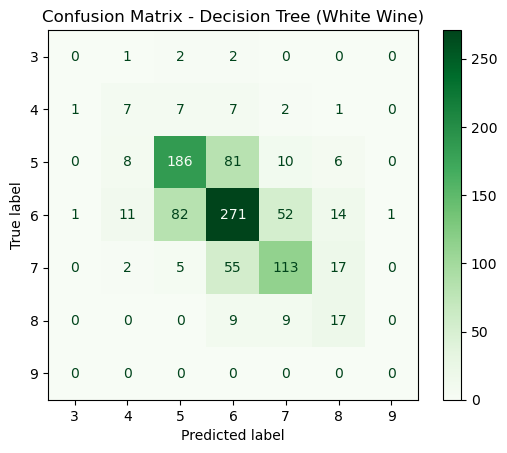

In [9]:
# visualization - confusion matrix 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred, labels=tree_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Decision Tree (White Wine)")
plt.show()


In [10]:
# *** Feature importnace ***

In [11]:
import pandas as pd

importances = tree_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
10,alcohol,0.145893
1,volatile acidity,0.113380
5,free sulfur dioxide,0.100240
6,total sulfur dioxide,0.093726
7,density,0.089028
4,chlorides,0.087367
0,fixed acidity,0.079707
2,citric acid,0.078579
8,pH,0.074284
9,sulphates,0.068968


C:\Users\wikto\AppData\Local\Temp\ipykernel_47616\3796402272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='summer')


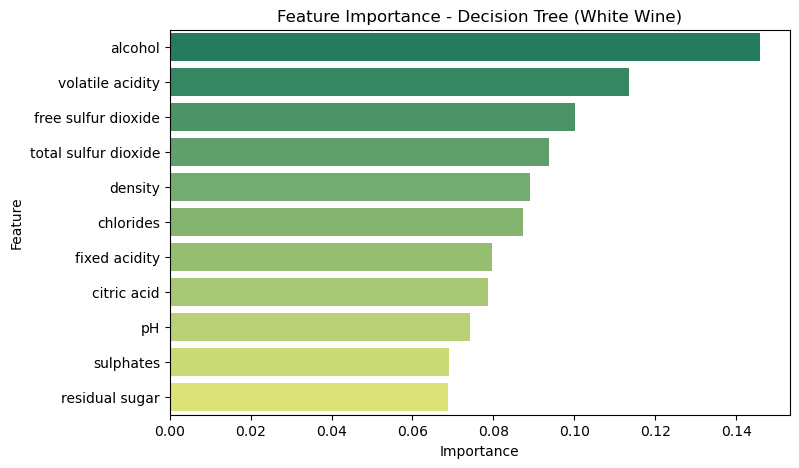

In [12]:
# visualization 

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='summer')
plt.title('Feature Importance - Decision Tree (White Wine)')
plt.show()

Accuracy using all features: 0.61


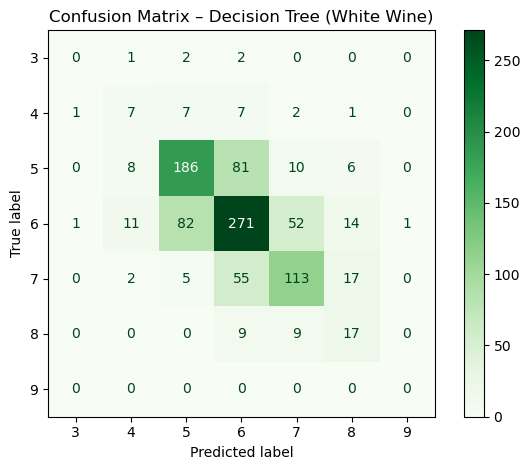

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Create X and y with all features
X_all = white_wine.drop("quality", axis=1)
y = white_wine["quality"]

# 2. Split the dataset
X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

# 3. Train the Decision Tree model
tree_model_all = DecisionTreeClassifier(random_state=42)
tree_model_all.fit(X_train_all, y_train)

# 4. Predict
y_pred_all = tree_model_all.predict(X_test_all)

# 5. Evaluate accuracy
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Accuracy using all features: {accuracy_all:.2f}")

# 6. Confusion Matrix Display (just like Random Forest)
cm_tree = confusion_matrix(y_test, y_pred_all, labels=tree_model_all.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_model_all.classes_)
disp_tree.plot(cmap='Greens')
plt.title("Confusion Matrix – Decision Tree (White Wine)")
plt.tight_layout()
plt.show()





In [14]:
# *** decision tree with top features 

In [15]:
# top 4 most important features
top_features = feature_importance_df['Feature'].head(4).tolist() # it was adjusted and checked with other numbers of features and re runned (eg. 5, 6, etc)
print("Top features:", top_features)

Top features: ['alcohol', 'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide']


In [16]:
X_top = white_wine[top_features]


# splitting data

from sklearn.model_selection import train_test_split

X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)


# retraining decision tree (as tests different number of features checked)

tree_model_top = DecisionTreeClassifier(random_state=42) # new model

tree_model_top.fit(X_train_top, y_train) # training 

y_pred_top = tree_model_top.predict(X_test_top) # prediction

# accuracy ! 
from sklearn.metrics import accuracy_score
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f"Accuracy using top features only: {accuracy_top:.2f}")

Accuracy using top features only: 0.59


In [17]:
# if 4 top features used accuracy = 0.59 - lower than when all features used, tried to re run with other number of features but the optimal results
# are achieved when using full feature set (different situation than in red wine)

In [18]:
# *** Random Forest Classifier *** 

In [19]:
# here tests with different number of top features 

from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=140, random_state=42)

rf_model.fit(X_train_top, y_train) # training (all features)

y_pred_rf = rf_model.predict(X_test_top) # prediction

# accuracy !
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (top features - depending on test): {accuracy_rf:.2f}")

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
# disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
# disp_rf.plot(cmap='Greens')
# plt.title("Confusion Matrix - Random Forest")
# plt.show()

Random Forest Accuracy (top features - depending on test): 0.66


Random Forest Accuracy (All Features): 0.69


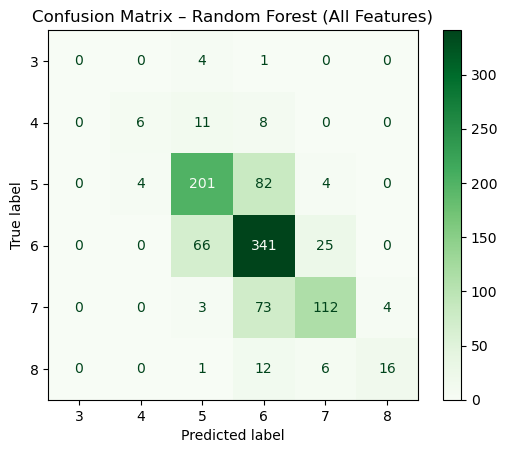

In [20]:
# here Random Forest with all fetaures 

from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier

rf_model_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_full.fit(X_train_full, y_train)

from sklearn.metrics import accuracy_score

y_pred_full = rf_model_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Random Forest Accuracy (All Features): {accuracy_full:.2f}")

# Vizualization - confusion matrix 

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


labels = np.unique(np.concatenate((y_test, y_pred_full)))
cm = confusion_matrix(y_test, y_pred_full, labels=labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix – Random Forest (All Features)")
plt.show()



In [21]:
# *** Random Forest ablation testing *** (top features importance in accuracy)

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# all  features
all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']


test_scenarios = {
    # individual feature tests
    'Only Alcohol': ['alcohol'],
    'Only Volatile Acidity': ['volatile acidity'],
    'Only Free Sulfur Dioxide': ['free sulfur dioxide'],
    'Only Total Sulfur Dioxide': ['total sulfur dioxide'],

    # feature removal tests
    'Without Alcohol': [f for f in all_features if f != 'alcohol'],
    'Without Volatile Acidity': [f for f in all_features if f != 'volatile acidity'],
    'Without Free Sulfur Dioxide': [f for f in all_features if f != 'free sulfur dioxide'],
    'Without Total Sulfur Dioxide': [f for f in all_features if f != 'total sulfur dioxide'],

    # features baseline
    'All Features': all_features
}

# function to run ablation test
def run_ablation_test(feature_list, scenario_name, show_confusion_matrix=False):
    """
    Run ablation test with specified features
    """
   
    X_test = white_wine[feature_list]  
    y_test = white_wine['quality']    

    X_train, X_val, y_train, y_val = train_test_split(
        X_test, y_test, test_size=0.2, random_state=42
    )

    
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # training model
    rf_model.fit(X_train, y_train)

  
    y_pred = rf_model.predict(X_val) # predicting 
    accuracy = accuracy_score(y_val, y_pred) #accuracy !

    print(f"{scenario_name}: {accuracy:.3f} ({accuracy*100:.1f}%)")

    

    return accuracy

# Run all ablation tests
print("ABLATION TEST RESULTS\n")

results = {}
for scenario_name, features in test_scenarios.items():
    accuracy = run_ablation_test(features, scenario_name)
    results[scenario_name] = accuracy



ABLATION TEST RESULTS

Only Alcohol: 0.497 (49.7%)
Only Volatile Acidity: 0.445 (44.5%)
Only Free Sulfur Dioxide: 0.448 (44.8%)
Only Total Sulfur Dioxide: 0.452 (45.2%)
Without Alcohol: 0.690 (69.0%)
Without Volatile Acidity: 0.695 (69.5%)
Without Free Sulfur Dioxide: 0.704 (70.4%)
Without Total Sulfur Dioxide: 0.691 (69.1%)
All Features: 0.690 (69.0%)


In [25]:
# SMOTE analysis for imbalanced dataset 


=== ORIGINAL CLASS DISTRIBUTION ===
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

Training set size: 3918
Training distribution: Counter({6: 1758, 5: 1166, 7: 704, 8: 140, 4: 130, 3: 16, 9: 4})

=== APPLYING SMOTE ===
Minimum class size: 4
Using k_neighbors: 3
After SMOTE size: 12306
SMOTE distribution: Counter({7: 1758, 5: 1758, 6: 1758, 8: 1758, 4: 1758, 3: 1758, 9: 1758})

=== TRAINING MODELS ===
Accuracy (Original): 0.6796
Accuracy (SMOTE): 0.6439

=== WHITE WINE FEATURE IMPORTANCE ===
BEFORE SMOTE (Top 5):
                feature  importance
0               alcohol    0.116547
1               density    0.102992
2      volatile acidity    0.100544
3   free sulfur dioxide    0.092152
4  total sulfur dioxide    0.090794

AFTER SMOTE (Top 5):
                feature  importance
0   free sulfur dioxide    0.133170
1         fixed acidity    0.106125
2               alcohol    0.104723
3             chlorides    0.101979
4  to

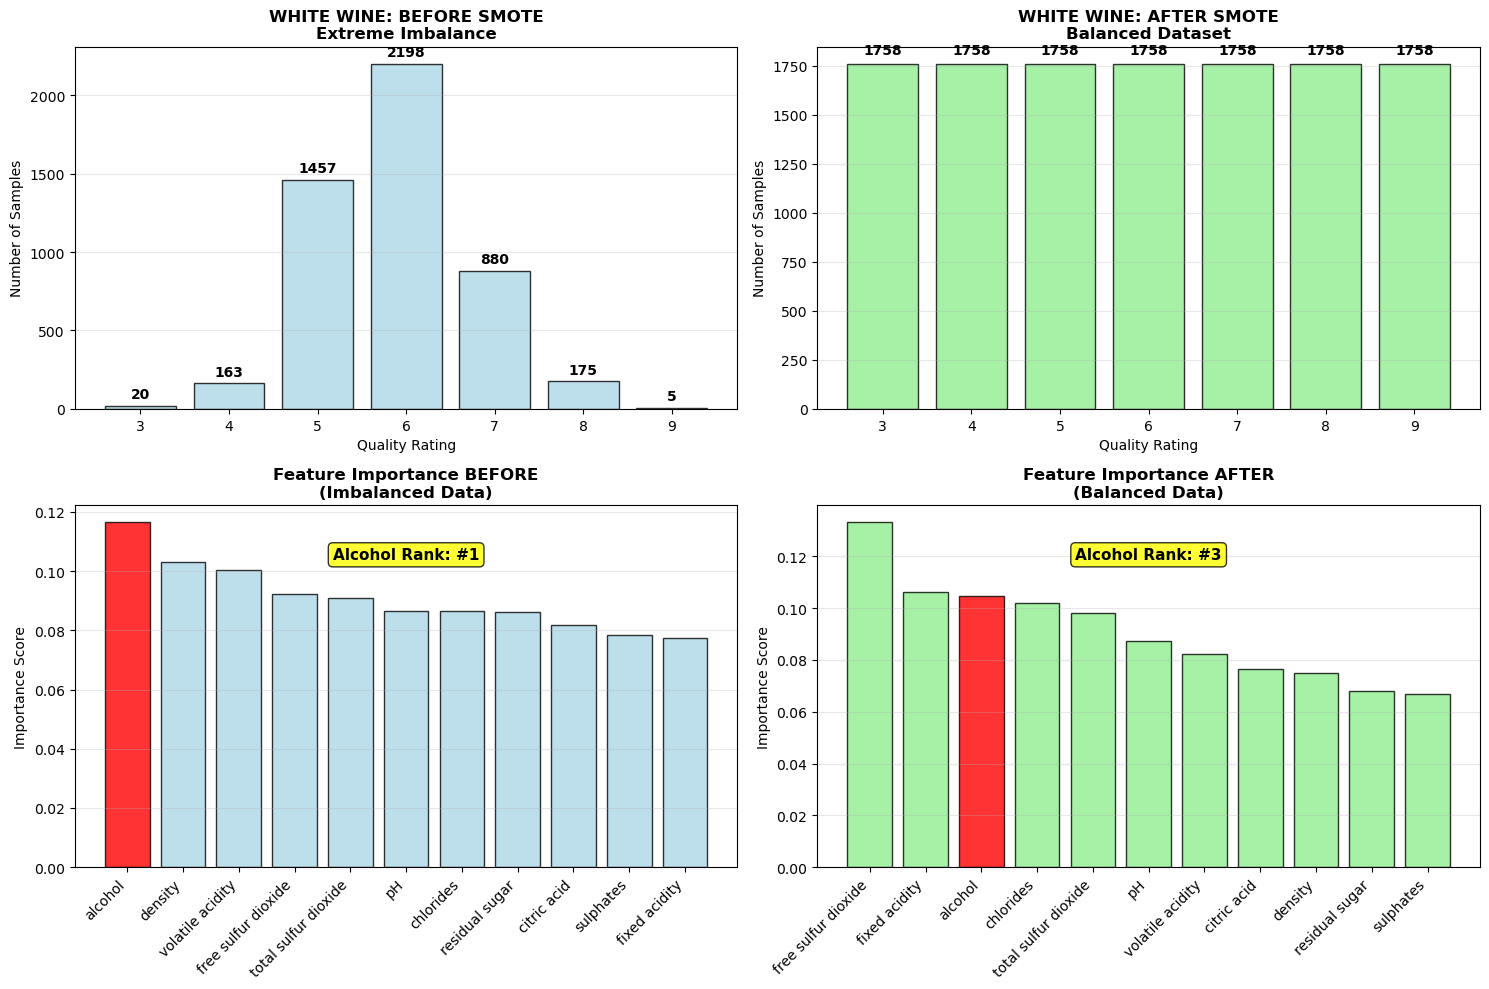

In [26]:
# WHITE WINE SMOTE ANALYSIS - Complete Training Code with Visualization (FIXED RANKING)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


# Step 1: Check class distribution
print("\n=== ORIGINAL CLASS DISTRIBUTION ===")
quality_counts_white = white_wine['quality'].value_counts().sort_index()
print(quality_counts_white)

# Step 2: Prepare data
X_white = white_wine.drop('quality', axis=1)
y_white = white_wine['quality']

# Split data
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
    X_white, y_white, test_size=0.2, random_state=42, stratify=y_white)

print(f"\nTraining set size: {len(X_train_white)}")
print("Training distribution:", Counter(y_train_white))

# Step 3: Apply SMOTE
print("\n=== APPLYING SMOTE ===")
# Find minimum class size and set k_neighbors
min_class_size_white = min(Counter(y_train_white).values())
k_neighbors_white = max(1, min_class_size_white - 1)
print(f"Minimum class size: {min_class_size_white}")
print(f"Using k_neighbors: {k_neighbors_white}")

smote_white = SMOTE(random_state=42, k_neighbors=k_neighbors_white)
X_train_white_smote, y_train_white_smote = smote_white.fit_resample(X_train_white, y_train_white)

print(f"After SMOTE size: {len(X_train_white_smote)}")
print("SMOTE distribution:", Counter(y_train_white_smote))

# Step 4: Train models
print("\n=== TRAINING MODELS ===")

# Train without SMOTE (original imbalanced data)
rf_white_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_white_original.fit(X_train_white, y_train_white)
y_pred_white_original = rf_white_original.predict(X_test_white)

# Train with SMOTE (balanced data)
rf_white_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_white_smote.fit(X_train_white_smote, y_train_white_smote)
y_pred_white_smote = rf_white_smote.predict(X_test_white)

# Step 5: Compare results
print(f"Accuracy (Original): {accuracy_score(y_test_white, y_pred_white_original):.4f}")
print(f"Accuracy (SMOTE): {accuracy_score(y_test_white, y_pred_white_smote):.4f}")

# Step 6: Feature importance analysis (FIXED RANKING)
feature_imp_white_original = pd.DataFrame({
    'feature': X_white.columns,
    'importance': rf_white_original.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

feature_imp_white_smote = pd.DataFrame({
    'feature': X_white.columns,
    'importance': rf_white_smote.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

print("\n=== WHITE WINE FEATURE IMPORTANCE ===")
print("BEFORE SMOTE (Top 5):")
print(feature_imp_white_original.head())

print("\nAFTER SMOTE (Top 5):")
print(feature_imp_white_smote.head())

# FIXED: Correct ranking calculation
alcohol_rank_original_white = feature_imp_white_original[feature_imp_white_original['feature'] == 'alcohol'].index[0] + 1
alcohol_rank_smote_white = feature_imp_white_smote[feature_imp_white_smote['feature'] == 'alcohol'].index[0] + 1

print(f"\n WHITE WINE ALCOHOL RANKING (CORRECTED):")
print(f"Before SMOTE: #{alcohol_rank_original_white}")
print(f"After SMOTE: #{alcohol_rank_smote_white}")

# Step 7: Create the 4-panel visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Before SMOTE (top left)
quality_counts_white = white_wine['quality'].value_counts().sort_index()
axes[0,0].bar(quality_counts_white.index, quality_counts_white.values, color='lightblue', alpha=0.8, edgecolor='black')
axes[0,0].set_title('WHITE WINE: BEFORE SMOTE\nExtreme Imbalance', fontweight='bold')
axes[0,0].set_ylabel('Number of Samples')
axes[0,0].set_xlabel('Quality Rating')
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(quality_counts_white.values):
    axes[0,0].text(quality_counts_white.index[i], v + 50, str(v), ha='center', fontweight='bold')

# 2. After SMOTE (top right)
smote_counts_white = pd.Series(Counter(y_train_white_smote)).sort_index()
axes[0,1].bar(smote_counts_white.index, smote_counts_white.values, color='lightgreen', alpha=0.8, edgecolor='black')
axes[0,1].set_title('WHITE WINE: AFTER SMOTE\nBalanced Dataset', fontweight='bold')
axes[0,1].set_ylabel('Number of Samples')
axes[0,1].set_xlabel('Quality Rating')
axes[0,1].grid(axis='y', alpha=0.3)

# Add value labels
for quality, count in smote_counts_white.items():
    axes[0,1].text(quality, count + 50, str(count), ha='center', fontweight='bold')

# 3. Feature Importance BEFORE SMOTE (bottom left)
colors_orig_white = ['red' if x == 'alcohol' else 'lightblue' for x in feature_imp_white_original['feature']]
axes[1,0].bar(range(len(feature_imp_white_original)), feature_imp_white_original['importance'],
              color=colors_orig_white, alpha=0.8, edgecolor='black')
axes[1,0].set_title('Feature Importance BEFORE\n(Imbalanced Data)', fontweight='bold')
axes[1,0].set_ylabel('Importance Score')
axes[1,0].set_xticks(range(len(feature_imp_white_original)))
axes[1,0].set_xticklabels(feature_imp_white_original['feature'], rotation=45, ha='right')
axes[1,0].grid(axis='y', alpha=0.3)

# 4. Feature Importance AFTER SMOTE (bottom right)
colors_smote_white = ['red' if x == 'alcohol' else 'lightgreen' for x in feature_imp_white_smote['feature']]
axes[1,1].bar(range(len(feature_imp_white_smote)), feature_imp_white_smote['importance'],
              color=colors_smote_white, alpha=0.8, edgecolor='black')
axes[1,1].set_title('Feature Importance AFTER\n(Balanced Data)', fontweight='bold')
axes[1,1].set_ylabel('Importance Score')
axes[1,1].set_xticks(range(len(feature_imp_white_smote)))
axes[1,1].set_xticklabels(feature_imp_white_smote['feature'], rotation=45, ha='right')
axes[1,1].grid(axis='y', alpha=0.3)

# Add annotations with CORRECT rankings
axes[1,0].text(0.5, 0.85, f'Alcohol Rank: #{alcohol_rank_original_white}', transform=axes[1,0].transAxes,
               fontsize=11, ha='center', fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
axes[1,1].text(0.5, 0.85, f'Alcohol Rank: #{alcohol_rank_smote_white}', transform=axes[1,1].transAxes,
               fontsize=11, ha='center', fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

plt.tight_layout()
plt.show()